# C2 DIBs peak separation analysis on HD 147889 sightline

This notebook provides a straightforward way to get the peak positions of any set of DIBs. It could be useful to analyze the peak structure of the C2 DIBs on some sightlines. It´s also possible to analyze any group of DIBs. 

In [1]:
# Import statemens
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from edibles.utils.simulations.AverageSpectrum import CreateAverageSpectrum
from edibles.utils.simulations.SimulatedContour import Simulated_Contour as sim
from edibles.utils.simulations.RotationalEnergies import WavelengthToWavenumber

# Set style of plots
def matplotlib_settings():
    sns.set_style('ticks')
    sns.set_context('talk', font_scale=0.8)
    mpl.rcParams['savefig.dpi'] = 72
    
matplotlib_settings()

Going Through


### Define sightline and group of DIBs

In [2]:
# All C2 DIBs
c2_dibs = [4727, 4963, 4363, 4734, 4969, 4979, 4984, 5003, 5170, 5175, 
            5418, 5512, 5541, 5546, 5762, 5769, 5793, 6729]

# Selected sightline
sightline = 'HD 147889'

# Dictionary to save spectrum data.
c2_data = {}

print(len(c2_dibs))

18


### Get the average spectrum from observational data.

In [25]:
# Obtain average spectrum of c2 dibs.
for i, dib in enumerate(c2_dibs):
     
    observation = CreateAverageSpectrum(dib, sightline, verbose=False)

    observation_wavenumber = WavelengthToWavenumber(observation[0]) - WavelengthToWavenumber(dib)
    observation_flux = observation[1]

    c2_data[dib] = [observation_wavenumber, observation_flux]

C:/Users/missa/Documents/Proyectos/mitacs/data
***Common Objects***
['HD 147889']
**Filtered File List**
10213    /HD147889/RED_564/HD147889_w564_n1_20140927_L....
10243    /HD147889/RED_564/HD147889_w564_n18_20150816_L...
10262    /HD147889/RED_564/HD147889_w564_n5_20140928_L....
10479    /HD147889/BLUE_437/HD147889_w437_n1_20160728_B...
10526    /HD147889/BLUE_437/HD147889_w437_n5_20160807_B...
Name: Filename, dtype: object
5
C:/Users/missa/Documents/Proyectos/mitacs/data
***Common Objects***
['HD 147889']
**Filtered File List**
10479    /HD147889/BLUE_437/HD147889_w437_n1_20160728_B...
10526    /HD147889/BLUE_437/HD147889_w437_n5_20160807_B...
Name: Filename, dtype: object
2
C:/Users/missa/Documents/Proyectos/mitacs/data
***Common Objects***
['HD 147889']
**Filtered File List**
10213    /HD147889/RED_564/HD147889_w564_n1_20140927_L....
10243    /HD147889/RED_564/HD147889_w564_n18_20150816_L...
10262    /HD147889/RED_564/HD147889_w564_n5_20140928_L....
10479    /HD147889/BLUE_437/HD1

''

### Functions to plot a set of DIBs and also individual DIBs.

In [4]:
def plot_c2dibs(c2_select = False, x_range = 3, offset = 0.06, peaks = False):
    # Plot all c2 dibs
    if c2_select == False:
        c2_select = c2_dibs

    fig, ax = plt.subplots(1, 1, figsize = (x_range*0.8, len(c2_select)))

    for i, dib in enumerate(c2_select):
        ax.plot(c2_data[dib][0][20:-20], c2_data[dib][1][20:-20]+offset*i)
        ax.plot(c2_data[dib][0][20:-20], 
                [1+offset*i for x in c2_data[dib][0][20:-20]],
                color = 'black', alpha = 0.3, ls = '--')
        if offset > 0.01:
            ax.text(-x_range+0.1, 1.002+offset*i, dib)
        if peaks:
            for peak in peaks[dib]:
                ymin = min(c2_data[dib][1][20:-20])+offset*i-0.005
                ax.vlines(peak, ymin = ymin, ymax = ymin+0.015, 
                          ls = '-', color = 'black', alpha = 1)
                ax.vlines(peak, ymin = ymin, ymax = 1+offset*i, 
                          ls = '--', color = 'blue', alpha = 0.1)
    if not peaks:
        ax.vlines(0.0, ymin = 0.93, ymax = 1+offset*(len(c2_select)-1), 
                  ls = '--', color = 'black', alpha = 0.3)
    plt.title(f'C2 DIBs on {sightline}')
    plt.xlabel(r'Wavenumber (cm$^{-1}$)')
    plt.ylabel('Normalized flux + offset')
    ax.set_xlim(-x_range, x_range)
    plt.show()
    
def plot_dib(dib, center_offset = 0, x_range = 3, peaks = False):
    # Plot individual C2 DIB
    fig, ax = plt.subplots(1, 1, figsize = (5, 4))

    ax.plot(c2_data[dib][0][20:-20]-center_offset, 
            c2_data[dib][1][20:-20])

    if peaks:
        for peak in peaks:
            ax.vlines(peak, ymin = min(c2_data[dib][1][20:-20])-0.02, 
                      ymax = 1, ls = '-', color = 'black', alpha = 1)
    
    plt.title(f'{dib} DIB in {sightline}')
    plt.grid(alpha = 0.5)
    plt.xlabel(r'Wavenumber (cm$^{-1}$)')
    plt.ylabel('Normalized flux')
    ax.set_xlim(-x_range, x_range)
    plt.show()

### Plot unprocessed set of DIBs

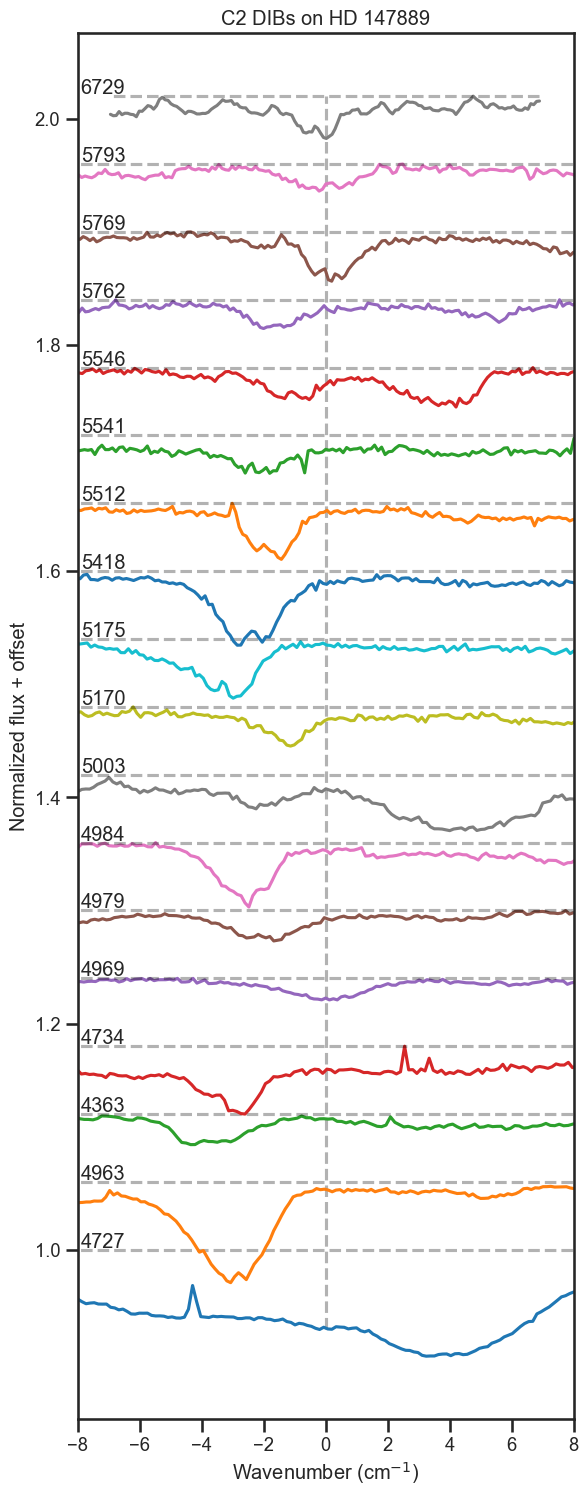

In [5]:
plot_c2dibs(x_range = 8)

### Selection of DIBs with peak structure.

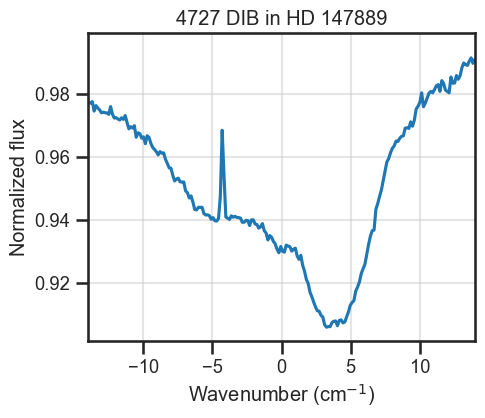

4727


In [6]:
# Here you can look closer to each DIB
# Select those that don't seem to have peak structure
i_dib = 0
plot_dib(c2_dibs[i_dib], x_range = 14)
print(c2_dibs[i_dib])

remove_dibs = [4727, 4734, 4969, 5003, 5170, 5541, 5793]

In [7]:
# We remove the DIBs that don't seem to have peak structure
for dib in remove_dibs: 
    if dib in c2_dibs:
        c2_dibs.remove(dib)

### Band centering at 0.

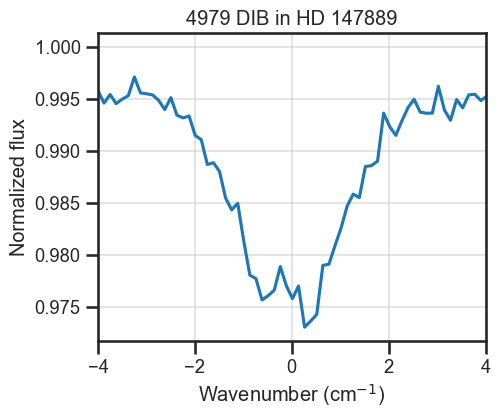

In [8]:
# The DIBs are not centerd at 0 yet, we need to fix that.

# Dict to save the x offset
center_offset = {4963: -2.8820, 4363: -3.6766, 4979: -1.9360, 4984: -2.4553,
                 5175: -3.3227, 5418: -2.3843, 5512: -1.8100, 5546: -1.0728,
                 5762: -1.6564, 5769: 0.1502, 6729: -0.3312}

# select the ith dib and modifyl center_offset manually.
i_dib = 2
center = center_offset[c2_dibs[i_dib]] # Use this if done

# Plot dib and print label
plot_dib(c2_dibs[i_dib], center_offset = center, x_range = 4)

In [9]:
# Update data of dibs
for dib in c2_dibs:
    wavenumber = c2_data[dib][0] - center_offset[dib]
    flux = c2_data[dib][1]
    
    # RUN ONLY ONCE.
    c2_data[dib] = [wavenumber, flux] 

### Visualize centered selected DIBs.

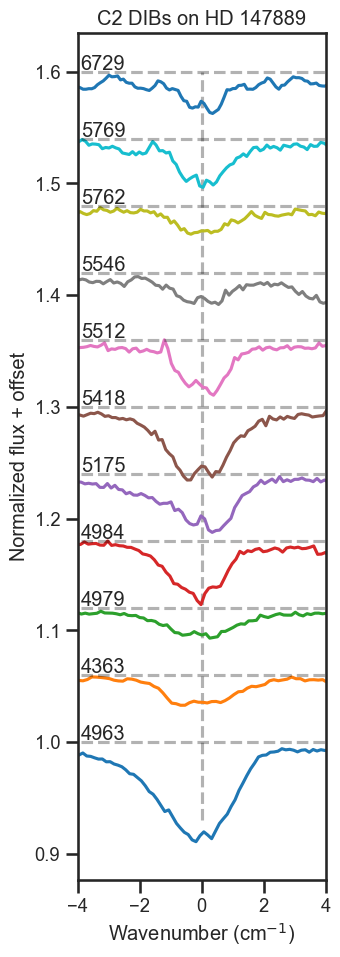

In [10]:
plot_c2dibs(x_range = 4)

### Separate two-peaks and three-peaks DIBs

In [11]:
# Now, we select dibs with two peaks
two_peaks_dibs = [5418, 5175, 6729, 5762, 5546]

# And with three peaks
three_peaks_dibs = [4963, 4984, 5512, 5769, 4979, 4363]

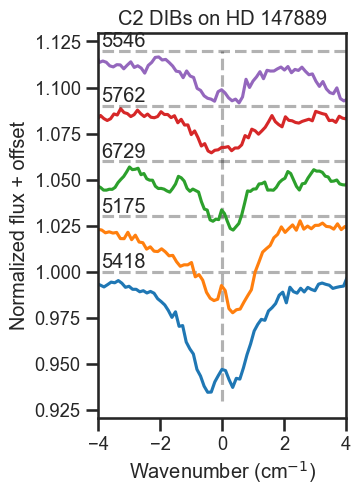

In [12]:
# The two-peak dibs
plot_c2dibs(c2_select = two_peaks_dibs, x_range = 4, offset = 0.03)

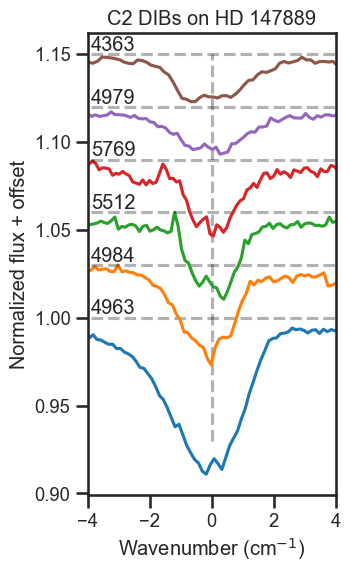

In [13]:
# The three-peak dibs
plot_c2dibs(c2_select = three_peaks_dibs, x_range = 4, offset = 0.03)

### Peak position selection

In [14]:
# Now we need to get the peak positions
peak_positions = {}

for dib in c2_dibs: 
    peak_positions[dib] = [-100, -100, -100]

In [15]:
peak_positions

{4963: [-100, -100, -100],
 4363: [-100, -100, -100],
 4979: [-100, -100, -100],
 4984: [-100, -100, -100],
 5175: [-100, -100, -100],
 5418: [-100, -100, -100],
 5512: [-100, -100, -100],
 5546: [-100, -100, -100],
 5762: [-100, -100, -100],
 5769: [-100, -100, -100],
 6729: [-100, -100, -100]}

6729


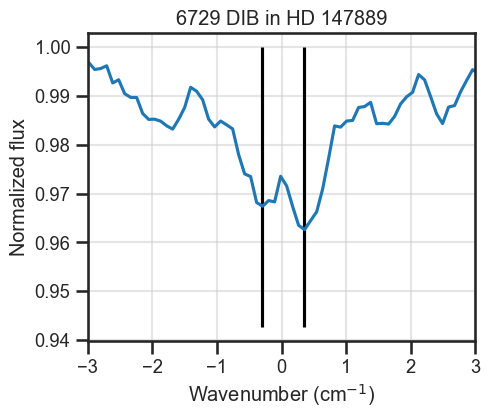

In [16]:
# Modify these values one by one
peak_positions = {4963: [-1.17729, -0.20299, 0.32479],
                 4363: [-0.59098, 0.1576, 0.60414],
                 4979: [-0.60505, 0.0, 0.2622],
                 4984: [-0.89367, -0.02415, 0.50323],
                 5175: [-0.26138, -100, 0.35474],
                 5418: [-0.42241, -100, 0.34067],
                 5512: [-0.40483, 0.04279, 0.37852],
                 5546: [-0.24383, -100, 0.54296],
                 5762: [-0.34637, -100, 0.31024],
                 5769: [-0.49576, 0.04657, 0.37559],
                 6729: [-0.29814, -100, 0.35337]}

# Select the ith dib and modify the values of peak_postions manually
i_dib = 10
print(c2_dibs[i_dib])
plot_dib(c2_dibs[i_dib], x_range = 3, peaks = peak_positions[c2_dibs[i_dib]])

### Plot results.

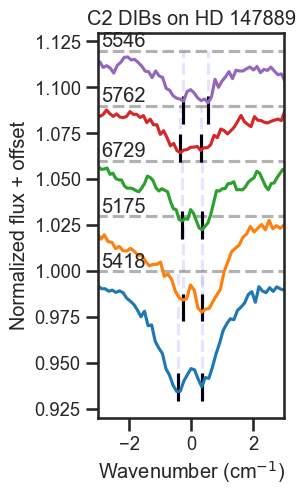

In [17]:
# The two-peak dibs
plot_c2dibs(c2_select = two_peaks_dibs, x_range = 3, offset = 0.03, peaks = peak_positions)

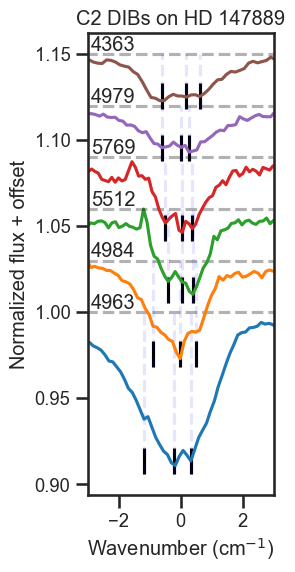

In [18]:
# The three-peak dibs
plot_c2dibs(c2_select = three_peaks_dibs, x_range = 3, offset = 0.03, peaks = peak_positions)

### Compute peaks separation and B, T estimation.

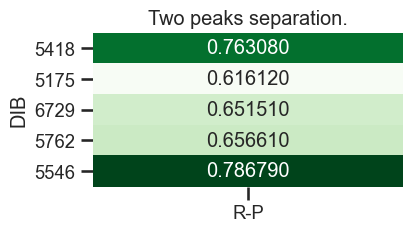

In [19]:
# Compute separation between two-peak dibs
separation_two = pd.DataFrame(columns = {'R-P'})
for dib in two_peaks_dibs:
    separation_two.loc[dib] = peak_positions[dib][2]-peak_positions[dib][0]

fig, ax = plt.subplots(1, 1, figsize = (4, 2))
sns.heatmap(separation_two, cmap = 'Greens', annot = True, fmt = 'f', cbar = False)
plt.yticks(rotation = 0)
plt.title('Two peaks separation.')
plt.ylabel('DIB')
plt.show()

For estimating $B\cdot T_{rot}$, we use: 

$$B\cdot T_{rot} \approx \frac{hc(\nu_R - \nu_P)^2}{8k}$$

Under the assumption of spherical/linear symmetry and $\Delta B/B \leq 1\%$

In [20]:
hc_k = 0.695034800

two_bt = separation_two.copy()
two_bt['B*T'] = hc_k/8*two_bt['R-P']
two_bt

,R-P,B*T
5418,0.76308,0.066296
5175,0.61612,0.053528
6729,0.65151,0.056603
5762,0.65661,0.057046
5546,0.78679,0.068356


In [21]:
# Compute separation between two-peak dibs
separation_three = pd.DataFrame(columns = {'R-P', 'Q-P', 'R-Q'})

for dib in three_peaks_dibs:
    separation_three.loc[dib, 'R-P'] = float(peak_positions[dib][2] - peak_positions[dib][0])
    separation_three.loc[dib, 'R-Q'] = float(peak_positions[dib][1] - peak_positions[dib][0])
    separation_three.loc[dib, 'Q-P'] = float(peak_positions[dib][2] - peak_positions[dib][1])

separation_three = separation_three.astype('float64')

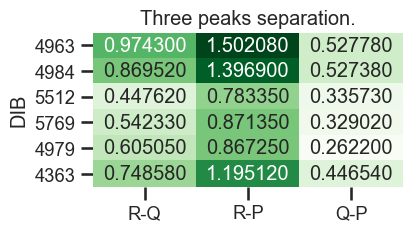

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (4, 2))
sns.heatmap(separation_three, cmap = 'Greens', annot = True, fmt = 'f', cbar = False)
plt.yticks(rotation = 0)
plt.title('Three peaks separation.')
plt.ylabel('DIB')
plt.show()

For estimating the rotational constant B, we use:

$$(\nu_R - \nu_Q) - (\nu_Q - \nu_P) \approx 2B$$

With the same assumtions.

In [23]:
rotational_B = separation_three.copy()
rotational_B['B*T'] = hc_k/8*rotational_B['R-P']**2

rotational_B['B'] = 0.5*(rotational_B['R-Q'] - rotational_B['Q-P'])
rotational_B['T'] = rotational_B['B*T']/rotational_B['B']

rotational_B.sort_values(by=['R-P'], inplace = True)
rotational_B

,R-Q,R-P,Q-P,B*T,B,T
5512,0.44762,0.78335,0.33573,0.053312,0.055945,0.952943
4979,0.60505,0.86725,0.26220,0.065344,0.171425,0.381181
5769,0.54233,0.87135,0.32902,0.065963,0.106655,0.618473
4363,0.74858,1.19512,0.44654,0.124091,0.151020,0.821685
4984,0.86952,1.39690,0.52738,0.169530,0.171070,0.990999
4963,0.97430,1.50208,0.52778,0.196021,0.223260,0.877994


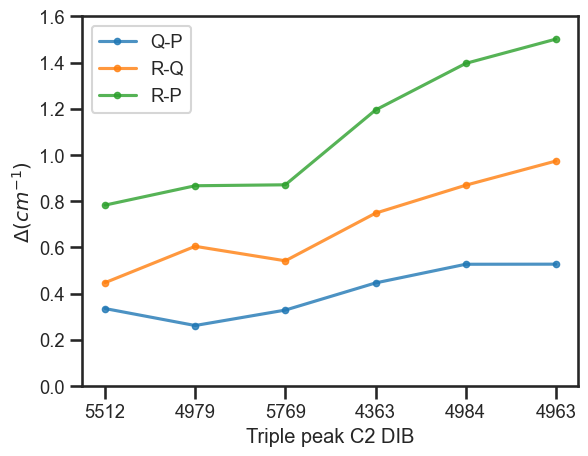

In [24]:
x = [x for x in range(6)]
plt.plot(x, rotational_B['Q-P'], label = 'Q-P', marker = '.', alpha = 0.8)
plt.plot(x, rotational_B['R-Q'], label = 'R-Q', marker = '.', alpha = 0.8)
plt.plot(x, rotational_B['R-P'], label = 'R-P', marker = '.', alpha = 0.8)
plt.xticks(x, list(rotational_B.index))
plt.xlabel('Triple peak C2 DIB')
plt.ylabel('$\Delta (cm^{-1})$')
plt.ylim(0, 1.6)
plt.legend()
plt.show()